# Сборный проект исследование рынка видеоигр


##  План работы по проекту.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Для решения этих задач необходимо разбить проект на несколько этапов:

**1. Предобработка данных.**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости; Описать причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**2. Исследовательский анализ данных.**
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**3. Составить портрет пользователя каждого региона.**

Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**4. Проверить гипотезы.**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**5. Общий вывод.**

##  Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st


In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Выведем общую информацию и первые 10 строк таблицы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем названия всех столбцов к одному виду

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Для выявления неявных дубликатов, приведу категориальные столбцы к нижнему регистру

In [ ]:
df['name'].str.lower()
df['platform'].str.lower()
df['genre'].str.lower()

0              sports
1            platform
2              racing
3              sports
4        role-playing
             ...     
16710          action
16711          sports
16712       adventure
16713        platform
16714      simulation
Name: genre, Length: 16715, dtype: object

Найдем явные дубликаты

In [ ]:
df.duplicated().sum()

0

Явных дубликатов нет

### Пропуски и типы данных

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;


Займемся анализом пропусков и в случае, где это возможно - их заменой или удалением.

In [ ]:
df.isnull().sum().to_frame()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


Проверим столбец с годом релиза

In [ ]:
display(df['year_of_release'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Посмотрим, какую информацию выдают строки, где нет года релиза.


In [ ]:
df[df['year_of_release'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.00,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.00,55.00,5.5,T


- Строки с пропусками годов релиза игр составляют 1,6% от всех строк, поэтому их можно удалить. Так как в дальнейшем, они будут мешать при анализе данных.
- В столбце Name 2 пропуска, удалим их.
- В столбце Genre, где жанр игры пропущен, его можно поискать по названию самой игры, но для экономии времени также удалим эти строки. Их всего 2

In [ ]:
display(df[df['name'].isna()])
display(df[df['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

Чекнем пропуски снова

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски остались в трех столбцах - critic_score, user_score и rating. Удалять их не представляется возможным, так как они занимают половину датасета, но и заменить средним или медианой тоже не имеет смысла - после этого адекватно проанализировать такие данные не получится. Оставим как есть.

Пропуски в оценках пользователей и критиков могли появиться в результате того, что не всем играм были поставлены такие оценки. Вероятно, пользователям было лень оценить игру, а до критиков такая игра могла не дойти, в виду её нишевости или неизвестности студии, которая её выпустила.

Что касается рейтинга ESRB, вероятно, что здесь имеется человеческий фактор и данные по играм просто не зполнены. Так как рейтинг присваивается всем играм, выпущенным на территории Северной Америки.

*Рекомендация - обратить внимание тем, кто агрегирует данные на отсутствие 50% информации в столбцах.*

 Перейдем к замене типов данных в столбцах, где это необходимо.

In [ ]:
# Столбец с годом релиза имеет тип данных float, заменим его на int
df['year_of_release'] = df['year_of_release'].astype(int)


Проверим, какие значения есть у столбцов с оценками игр

In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оба столбца имеют неправильный тип данных, с которыми в дальнейшем будет трудно работать. Изменим типы данных в них <a id='intro'></a>

Так же в столбце user_score имеется аббревиатура tbd, что означает To Be Determined, то есть "Будет определено" - рейтинг по игре будет определен позднее. А так как датасет нам достался в конечном виде, то и tbd = пропуску в данных. А значить заменим его на NaN.  


In [ ]:
df.loc[df['user_score']== 'tbd', 'user_score'] = '0'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
#Изменим тип данных, игнорируем пропуски
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')
df['critic_score']= df['critic_score'].astype(int, errors='ignore') #!!!!! не получилось изменить тип данных

In [ ]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Из материалов [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board#%D0%9A%D1%80%D0%B0%D1%82%D0%BA%D0%B8%D0%B5_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D1%8F) расшифруем обозначения
- *E* - Для всех
- *M* - Для взрослых(старше 17 лет)
- *T* - для лиц от 13 лет
- *E10+* - Для всех от 10 лет и старше
- *K-A* - Для всех. Обозначался до 1999 года. Далее обозначается как E
- *AO* - Только для взрослых (18+)
- *EC* - Для детей младшего возраста
- *RP* - Рейтинг ожидается

Так как K-A и Е это обозначение одного и того же рейтинга, то заменим К-А на Е.
RP для нас означает,что рейтинга еще нет, поэтому поставим 0.

In [ ]:
df.loc[df['rating']== 'RP', 'rating'] = '0'
df['rating'] = df['rating'].fillna(value='0')
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'].unique()

array(['E', '0', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [ ]:
df['rating'].value_counts()

0       6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

In [ ]:
df.loc[df['rating']== 'AO', 'rating'] = '0'
df['rating'] = df['rating'].replace('EC', 'E')
df['rating'].value_counts()

0       6678
E       3932
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

### **Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [ ]:
df['total_sales']= df['na_sales'] + df['eu_sales'] + df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


👍

In [ ]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### **Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

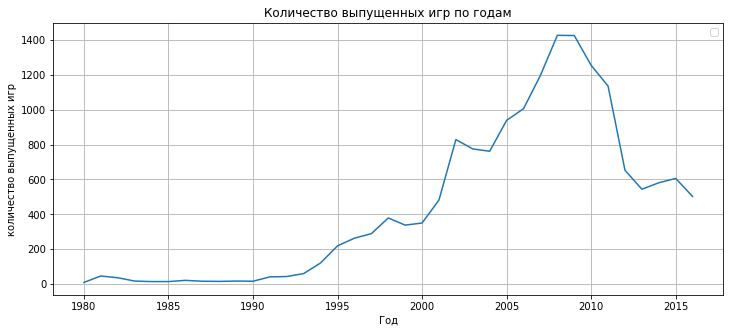

In [ ]:
games_to_years = (df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(12, 5))
)
plt.legend('')
plt.xlabel('Год')
plt.ylabel('количество выпущенных игр')
plt.title('Количество выпущенных игр по годам')
plt.show()

Вплоть до 1995 года, количество выпускаемых игр ежегодно было небольшим и составляло от 0 до 200 штук. С 1995 по 2000 - от 200 до 400 игр. Считаю, что из замалого количества выпущенных игр, данные до 2000 года не будут актуальны для последующего анализа. Поэтому их отброшу. Так как игровой рынок оченьу динамичный, то необходимо брать данные за период 3-5 лет.

### **Посмотрим, как менялись продажи по платформам.**

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
# взял актуальный период с 2013 по 2016 годы
platforms = (df_good.pivot_table(index='platform', values='total_sales', aggfunc='sum'))
display(platforms.sort_values(by='total_sales'))

,total_sales
platform,
DS,1.54
PSP,3.50
Wii,13.66
PSV,32.99
PC,39.43
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32


Для того, чтобы понять какое количество игр продавалось по платформам по годам, построим тепловую карту.

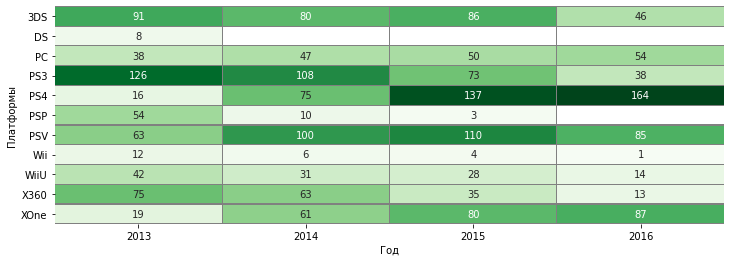

In [ ]:
platforms_heatmap = (df_good.pivot_table(index='platform', values='total_sales', 
                                         columns='year_of_release', aggfunc='count'))

plt.figure(figsize=(12, 4))
sns.heatmap(platforms_heatmap, annot=True, fmt=".4g", vmin=0, 
            cmap='Greens', cbar=False, robust=True, linewidths=.2, linecolor='grey')

plt.xlabel('Год')
plt.ylabel('Платформы')
plt.show()

За четыре года вряд ли что-то можно сказать о жизненных циклах, для этого я возьму период с 2005 года.

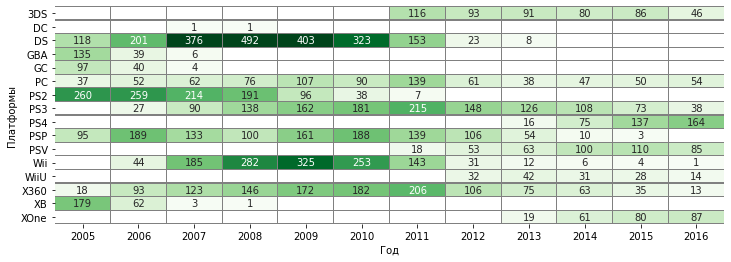

In [ ]:
platforms_heatmap_2005 = (df.query('year_of_release>2004').pivot_table(index='platform', values='total_sales', 
                                         columns='year_of_release', aggfunc='count'))

plt.figure(figsize=(12, 4))
sns.heatmap(platforms_heatmap_2005, annot=True, fmt=".4g", vmin=0, 
            cmap='Greens', cbar=False, robust=True, linewidths=.2, linecolor='grey')

plt.xlabel('Год')
plt.ylabel('Платформы')
plt.show()

Жизненный цикл игровых консолей составляет 6-8 лет. И он совпадает с выходом конслоей нового поколений. Это видно на тепловой карте и это подтверждается годами выхода основных консолей [Playstation](https://ru.wikipedia.org/wiki/PlayStation_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9) и [Xbox](https://ru.wikipedia.org/wiki/Xbox_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9))

Проверю свое предположение относительно жизненного цикла на примере PS3 и XBOX360.

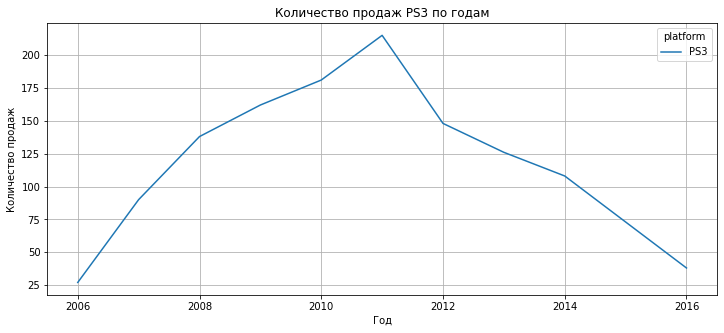

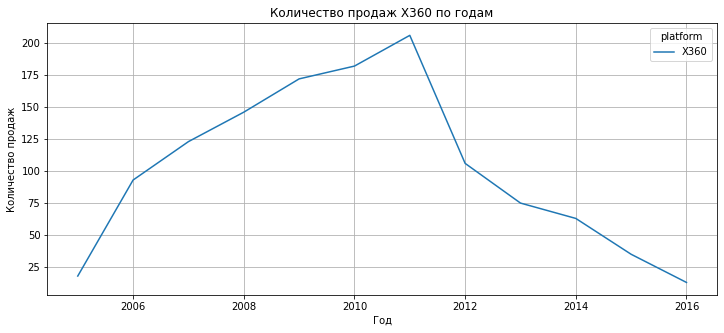

In [ ]:
PS3_all = df.query('platform=="PS3"').pivot_table(index='year_of_release', 
                                                   values='total_sales', columns='platform', aggfunc='count')
PS3_all.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж PS3 по годам')
plt.grid(True)
plt.show()

X360_all = df.query('platform=="X360"').pivot_table(index='year_of_release',
                                                     values='total_sales', columns='platform', aggfunc='count')
X360_all.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж X360 по годам')
plt.grid(True)
plt.show()

По графикам видно, что каждая из консолей продается по 10 лет, при этом основной объем продаж свыше 100 млн ежегодно приходится на период в 6-7 лет.

*В топ-5 лидеров продаж по играм входят следующие консоли:*
*- PS 2*
*- XBOX 360*
*- Wii*
*- PS 3*
*- DS*


По состоянию на 2016 год жизненный цикл этих консолей уже прошёл или подходит к концу, таким образом в топ продаж не вошли современные консоли, типа PS4 и XBOX one.



В топ-5 лидеров продаж по играм за период 2010-2016 входят следующие консоли:
* PS4
* PS3
* XOne
* 3DS
* X360


### Для того, чтобы узнать **растут или падают** продажи верхней пятерки, построим график продаж.

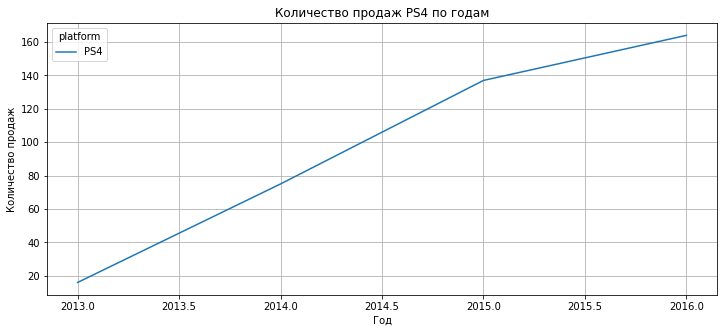

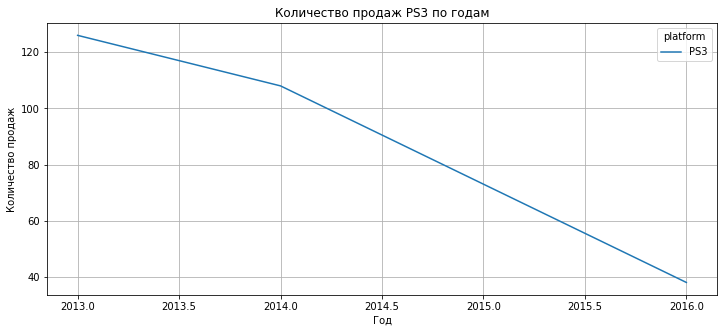

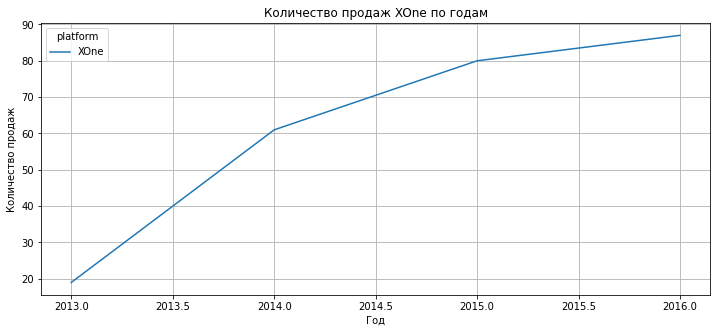

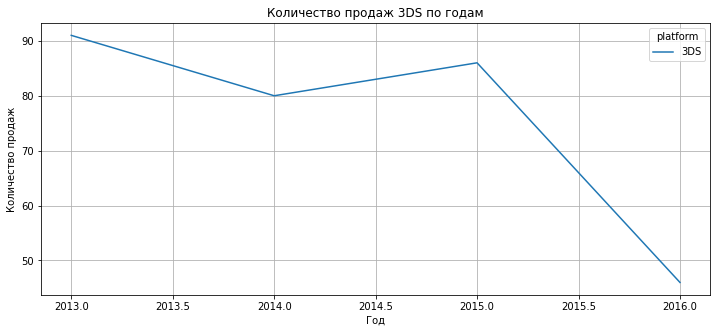

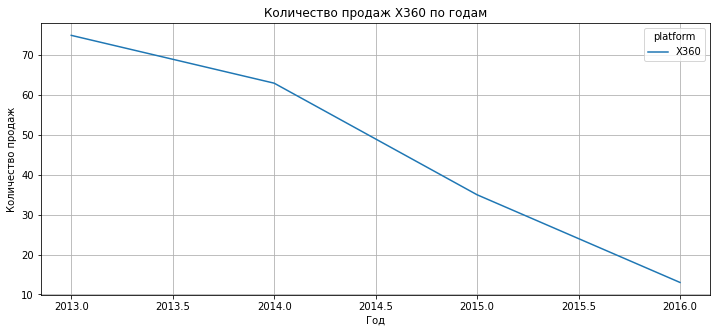

In [ ]:
PS4 = df_good.query('platform=="PS4"').pivot_table(index='year_of_release',
                                                   values='total_sales', columns='platform', aggfunc='count')
PS4.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж PS4 по годам')
plt.grid(True)
plt.show()

PS3 = df_good.query('platform=="PS3"').pivot_table(index='year_of_release', 
                                                   values='total_sales', columns='platform', aggfunc='count')
PS3.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж PS3 по годам')
plt.grid(True)
plt.show()

XOne = df_good.query('platform=="XOne"').pivot_table(index='year_of_release',
                                                     values='total_sales', columns='platform', aggfunc='count')
XOne.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж XOne по годам')
plt.grid(True)
plt.show()


DS = df_good.query('platform=="3DS"').pivot_table(index='year_of_release',
                                                 values='total_sales', columns='platform', aggfunc='count')
DS.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж 3DS по годам')
plt.grid(True)
plt.show()

X360 = df_good.query('platform=="X360"').pivot_table(index='year_of_release',
                                                     values='total_sales', columns='platform', aggfunc='count')
X360.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж X360 по годам')
plt.grid(True)
plt.show()


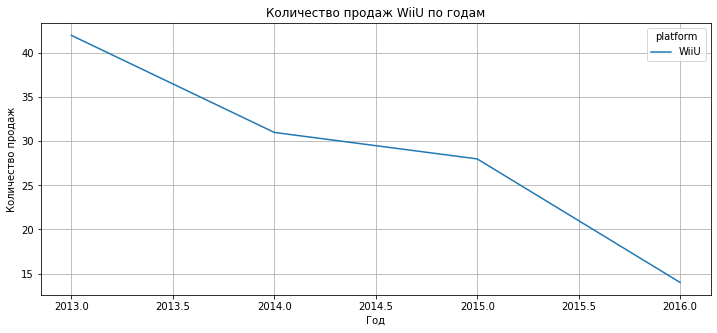

In [ ]:
WiiU = df_good.query('platform=="WiiU"').pivot_table(index='year_of_release',
                                                     values='total_sales', columns='platform', aggfunc='count')
WiiU.plot( grid=True, figsize=(12, 5))
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.title('Количество продаж WiiU по годам')
plt.grid(True)
plt.show()

К 2016 году продажи консолей старого поколения идут на спад. Тогда как у новых консолей - PS4 и XboxOne идет рост продаж

### **Выберем потенциально прибыльные платформы и посмотрим на статистику их продаж**

In [ ]:
actual_platforms = ["PS3", "X360", "PS4", "3DS", "XOne"]
display(df_good.query('platform in @actual_platforms').groupby('platform')['total_sales'].describe())

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
PS3,345.00,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
X360,186.00,0.74,1.66,0.01,0.08,0.27,0.80,16.27
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


### **Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

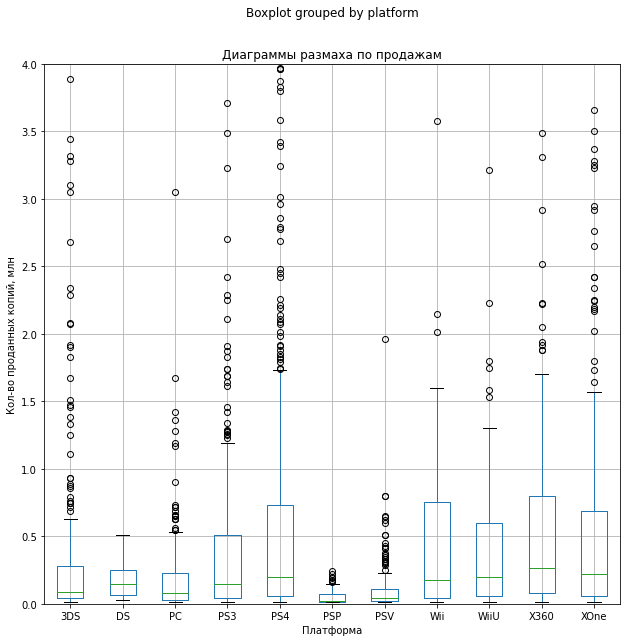

In [ ]:
(df_good.boxplot(column='total_sales', by='platform', figsize=(10,10))
);
plt.xlabel('Платформа')
plt.ylabel('Кол-во проданных копий, млн')
plt.title('Диаграммы размаха по продажам')
plt.ylim(0, 4) #в каждой платформе имеются выбросы свыше 20 млн проданных копий, они исказят читаемость графика, 
               #но никак не повлияют на выводы. Поэтому поставим верхний лимит в 4 млн копий
plt.show();

**ВЫВОД:**
Самыми популярным платформами являются PS4, Wii и Xbox360, но и размахи по продажам у них самые большие. PSP и PSV самые непопулярные платформы из представленных. По графику видно, что медианное значение продаж игр на всех платформах не дотягивает до 500 тысяч копий. Но в каждой платформе есть игры-хиты, которые продались больше 3х млн копий.

### **Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.** 

Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

Для примера возьмём игровую консоль **XOne**

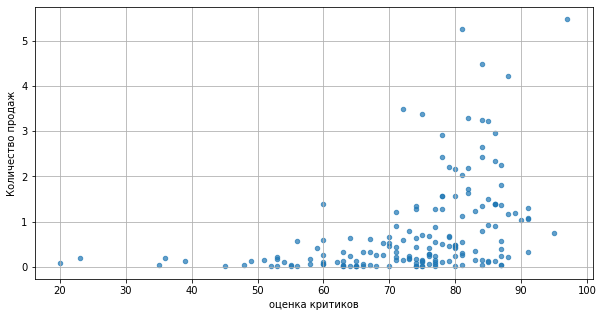

Корреляция между продажами и оценкой критиков: 0.42


In [ ]:
(df.query('platform== "XOne"').plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, 
                                           colormap='plasma', sharex=False))
plt.xlabel('оценка критиков')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
# и выявим корреляцию между отзывами критиков и продажами
corr_critic = df_good.query('platform == "XOne"')

print(f'Корреляция между продажами и оценкой критиков: {corr_critic.critic_score.corr(corr_critic.total_sales):.2}')


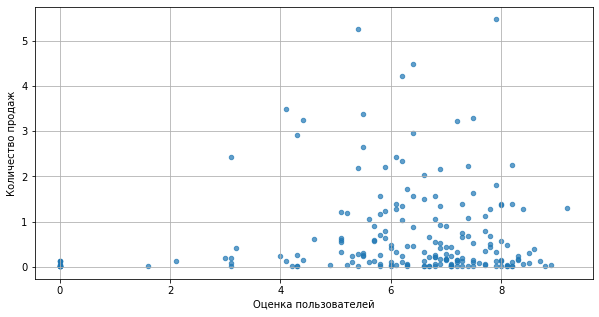

Корреляция между оценкой пользователей и продажами: 0.074


In [ ]:
df.query('platform== "XOne"').plot.scatter('user_score',  'total_sales', figsize=(10, 5), alpha=0.7, cmap='PuRd', sharex=False)

# теперь выявим корреляцию между отзывами юзверей и продажами
corr_users = df_good.query('platform == "XOne"')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
print(f'Корреляция между оценкой пользователей и продажами: {corr_users.user_score.corr(corr_users.total_sales):.2}')

**ВЫВОД:** Между оценками критиков и продажами есть прямая корреляция. Чем лучше оценка критиков, тем лучше продажи игр на этой платформе. Однако, между оценками пользователей и продажами корреляция хоть и прямая, но её почти нет.



**Соотнесите выводы с продажами игр на других платформах.**


Для сравнения и выводов возьмем ещё две платформы - XBOX360 и PS4

**XBOX360**

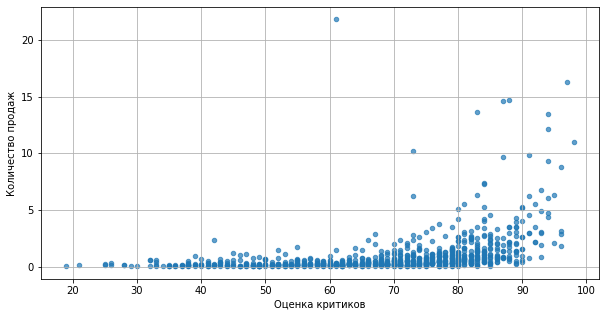

Корреляция между продажами и оценкой критиков: 0.35


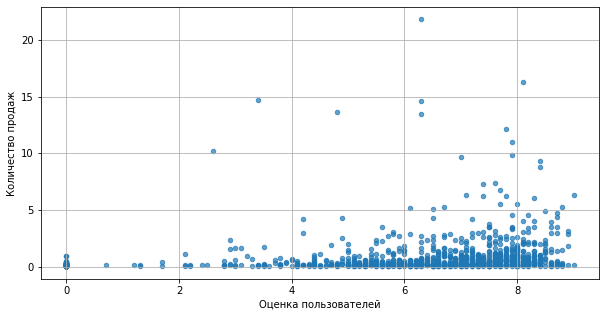

Корреляция между оценкой пользователей и продажами: 0.06


In [ ]:
df.query('platform== "X360"').plot.scatter('critic_score',  'total_sales',\
                                           figsize=(10, 5), alpha=0.7, colormap='plasma', sharex=False)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
# выявим корреляцию между отзывами критиков и продажами
corr_critic = df_good.query('platform == "X360"')

print(f'Корреляция между продажами и оценкой критиков: {corr_critic.critic_score.corr(corr_critic.total_sales):.2}')

df.query('platform== "X360"').plot.scatter('user_score',  'total_sales', figsize=(10, 5),\
                                           alpha=0.7, cmap='PuRd', sharex=False)
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
# выявим корреляцию между отзывами юзверей и продажами
corr_users = df_good.query('platform == "X360"')
print(f'Корреляция между оценкой пользователей и продажами: {corr_users.user_score.corr(corr_users.total_sales):.2}')

**PS4**

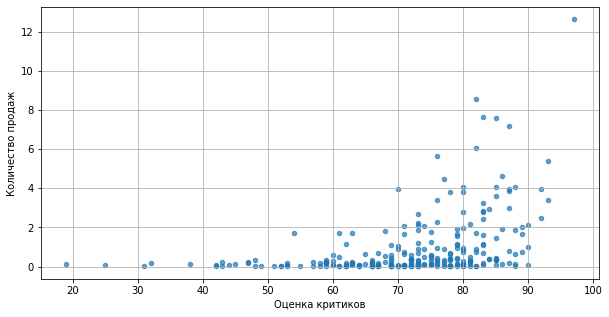

Корреляция между продажами и оценкой критиков: 0.41


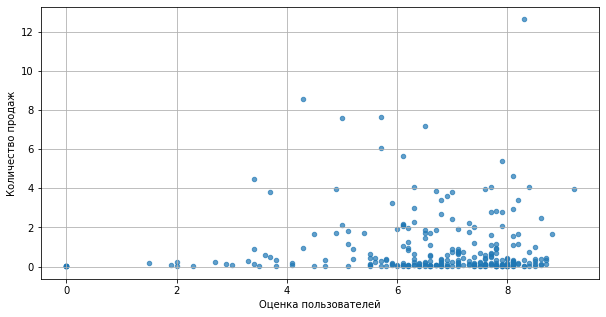

Корреляция между оценкой пользователей и продажами: 0.023


In [ ]:
df.query('platform== "PS4"').plot.scatter('critic_score',  'total_sales', figsize=(10, 5), \
                                          alpha=0.7, colormap='plasma', sharex=False)
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
# выявим корреляцию между отзывами критиков и продажами
corr_critic = df_good.query('platform == "PS4"')

print(f'Корреляция между продажами и оценкой критиков: {corr_critic.critic_score.corr(corr_critic.total_sales):.2}')

df.query('platform== "PS4"').plot.scatter('user_score',  'total_sales', figsize=(10, 5),\
                                          alpha=0.7, cmap='PuRd', sharex=False)
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()
# теперь выявим корреляцию между отзывами юзверей и продажами
corr_users = df_good.query('platform == "PS4"')
print(f'Корреляция между оценкой пользователей и продажами: {corr_users.user_score.corr(corr_users.total_sales):.2}')

**ВЫВОД:** Соотношение корреляций критиков и пользователей для XBOX360 и PS4 похожи. Это подтверждает предыдущий вывод по консоли XOne

### **Распределение игр по жанрам.** 
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

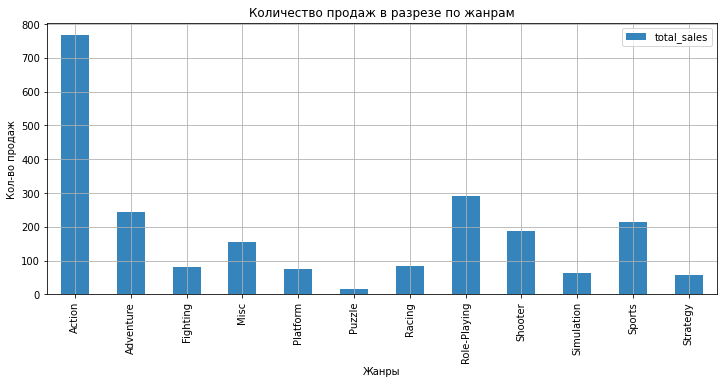

In [ ]:
(df_good.pivot_table(index='genre', values='total_sales', aggfunc=('count'))
    .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Количество продаж в разрезе по жанрам')
plt.show()

 Для того, чтобы высянить какой жанр приносит больше прибыли, построим график жанров в разрезе по суммам продаж

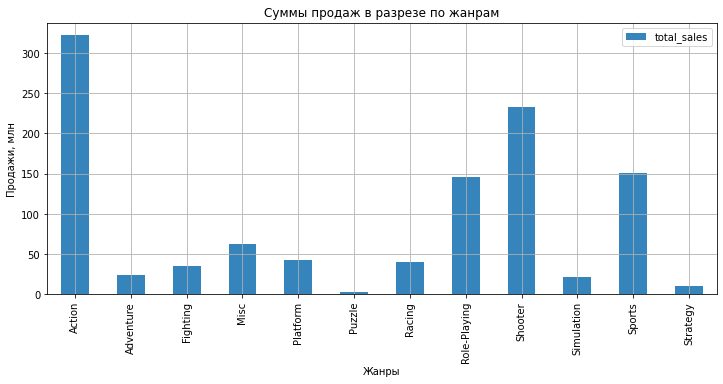

In [ ]:
(df_good.pivot_table(index='genre', values='total_sales', aggfunc=('sum'))
    .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн')
plt.title('Суммы продаж в разрезе по жанрам')
plt.show()

При сравнении двух графиков, видим, что по объемам продаж и сумме лидирует жанр Action. Но дальше картина интересней - несмотря на то, что объемы продаж игр жанров adventure, RPG и sports примерно одинаковы и больше количества проданных игр жанра Shooter, каждый из жанров принес меньше прибыли, чем Shooter.

Наиболее прибыльные жанры:
- Action
- Shooter
- Sports
- RPG

Наиболее продаваемые жанры:
- Action
- adventure
- RPG 
- sports


In [ ]:
df_good.pivot_table(index='genre', values='total_sales', aggfunc=('count')).sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


**ВЫВОД:** 
Самый продаваемый жанр игр - это action. Можно сделать вывод, что люди больше любят играть во что то активное и быстрое. То, что не треубует напряженное мыслительной и аналитической деятельности. Такие жанры больше задействуют рефлексы.
Однако, неясно разделение составителями датафрейма на action и другие быстрые и активные игры.Так как в action включаются такие жанры, как shooter и fighting. Если в action включить вышеуказанные жанры, то разрыв этого жанра с остальными будет ещё больше.

И наоборот, менее продаваемые игры, такие как стратегия и паззлы требуют "включения мозга" и наиболее медлительные. Стратегии требуют более длинных игровых сессий, в отличие от футбольного матча FIFA или забега в Сounter-strike

<div class="alert alert-info">
<font size="4"><b> Диаграмма размаха прибыльности жанров</b></font>
    <br /> 
    <font size="3", color = "black"> 

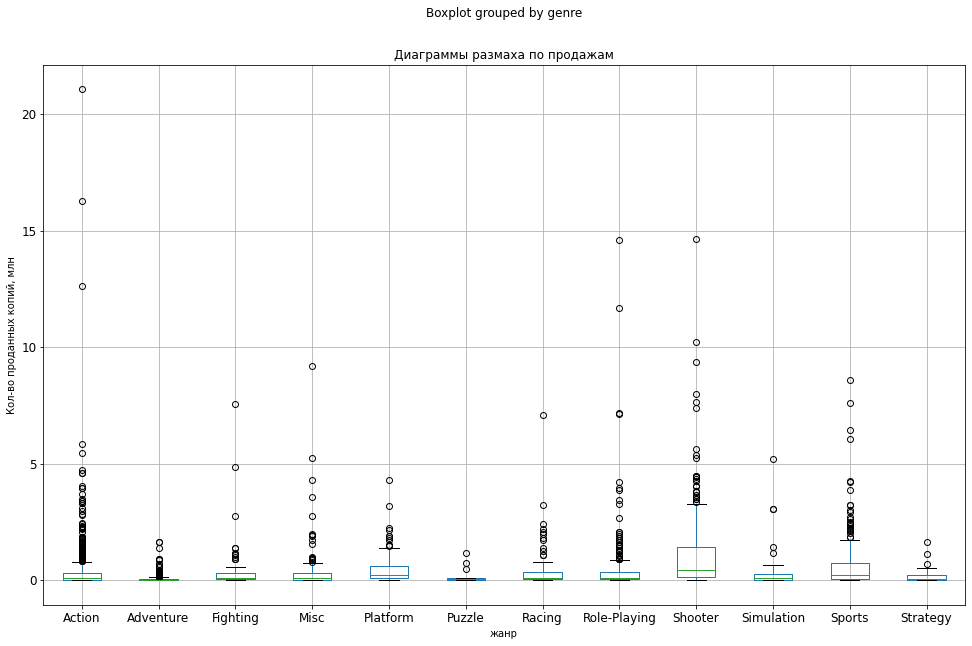

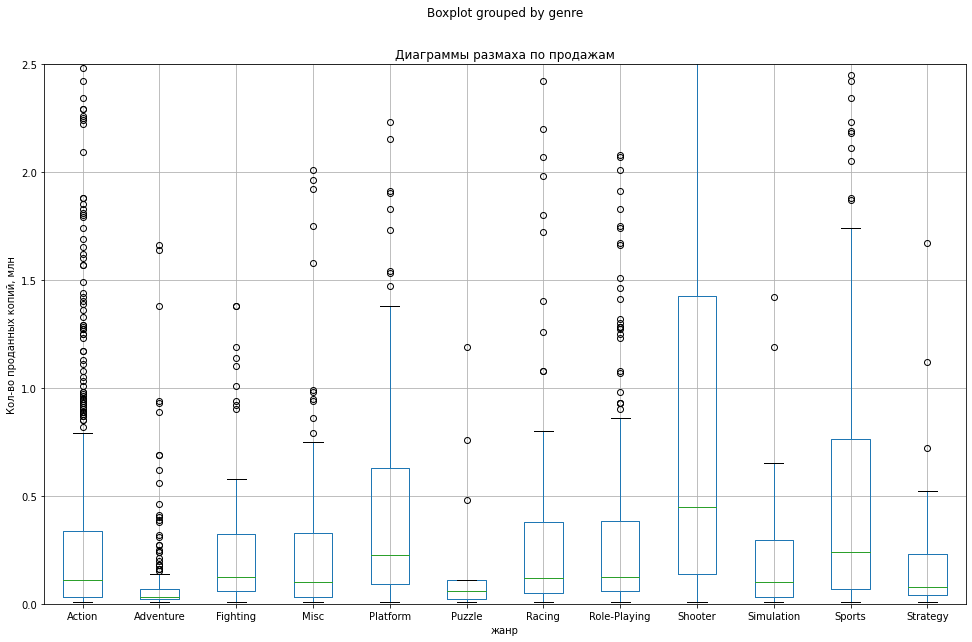

In [ ]:
df_good.boxplot(column='total_sales', by='genre', figsize=(16,10), fontsize='large');
plt.xlabel('жанр')
plt.ylabel('Кол-во проданных копий, млн')
plt.title('Диаграммы размаха по продажам')

plt.show();
df_good.boxplot(column='total_sales', by='genre', figsize=(16,10));
plt.xlabel('жанр')
plt.ylabel('Кол-во проданных копий, млн')
plt.title('Диаграммы размаха по продажам')
plt.ylim(0, 2.5) #в каждой платформе имеются выбросы свыше 20 млн проданных копий, они исказят читаемость графика, 
               #но никак не повлияют на выводы. Поэтому поставим верхний лимит в 4 млн копий
plt.show();

**ВЫВОД:**

Самые большие медианные продажи имеются у жанра shooter. Но все медианные продажи во всех жанрах на уровне менее полумиллиона копий. Самые маленькие медианы у жанров adventure, puzzle и strategy.

Если обратиться к первому графику, то заметим, что больше всего игровых хитов (свыше 10 млн) приходится на жанры shooter, action и rpg.

### Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### **Северная Америка**

Сначала проанализируем пользователей Северной Америки и выясним какие у них платформы и жанры самые любимые. Далее, выясним влияет ли рейтинг ESRB на продажи игр в этом регионе.

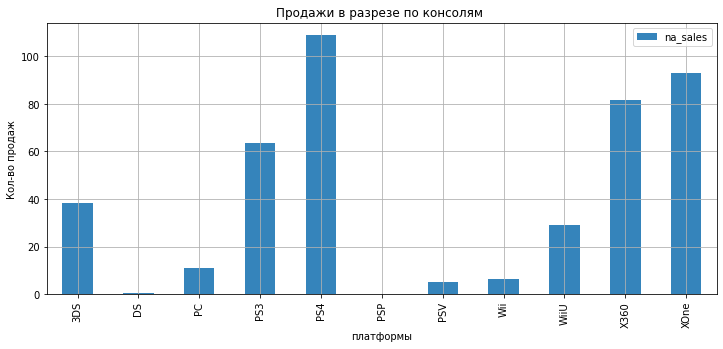

In [ ]:
# посмотрим на распределение платформ
(df_good.pivot_table(index='platform', values='na_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('платформы')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по консолям ')
plt.show()

Посмотрим на распределение по жанрам

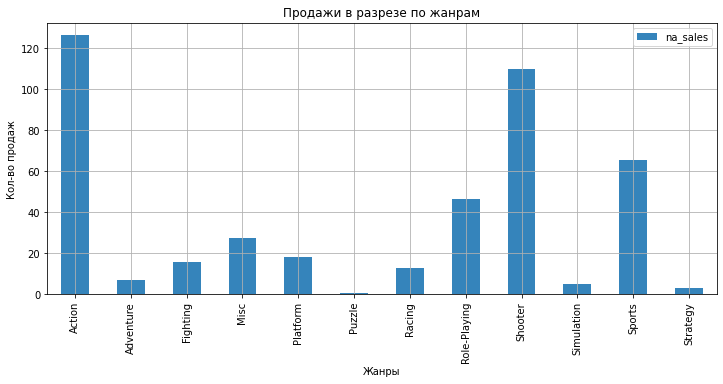

In [ ]:
(df_good.pivot_table(index='genre', values='na_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по жанрам')
plt.show()

**ВЫВОД:** Самые популярные платформы в Северной Америке - PS4, XBOX One и XBOX360. Больше всего ценятся такие игровые жанры как экшн, спорт и шутеры. Меньше всего пользователи любят стратегии, паззлы и симуляторы. 

### **Япония**

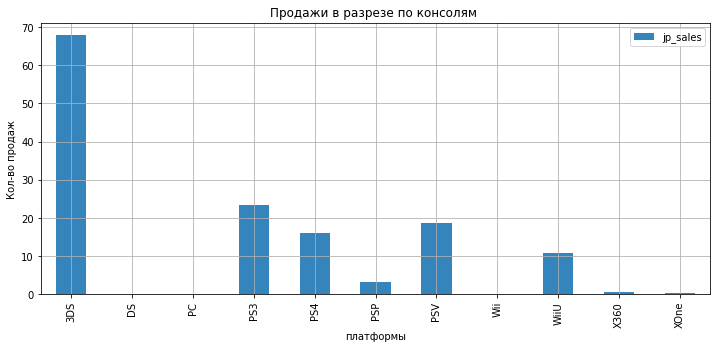

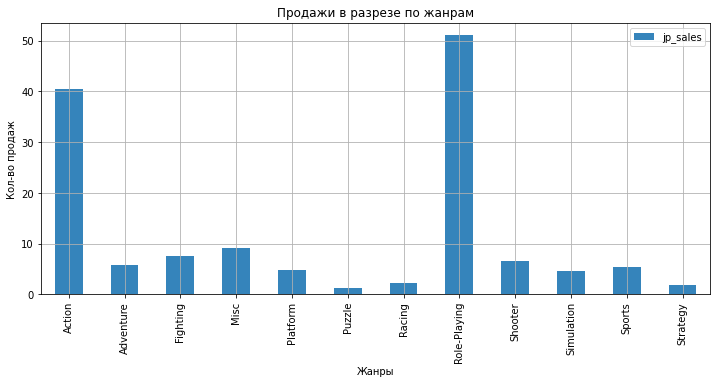

In [ ]:
(df_good.pivot_table(index='platform', values='jp_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('платформы')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по консолям ')
plt.show()

(df_good.pivot_table(index='genre', values='jp_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по жанрам')
plt.show()

**ВЫВОД:** В отличие от Северной Америки, в Японии большей популярностью пользуются консоли местного производства - Nintendo (3DS) и PlayStation (PS3, PSV).

Так же различаются жанровые предпочтения. В Японии больше всего любят играть в RPG. На втором месте стоит экшн. А спорт, как в других регионах - не является популярным. Меньше всего играют в паззлы, гонки и стратегии.

### **Европа**

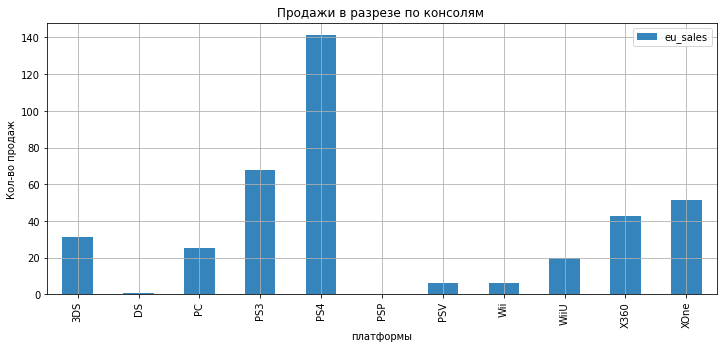

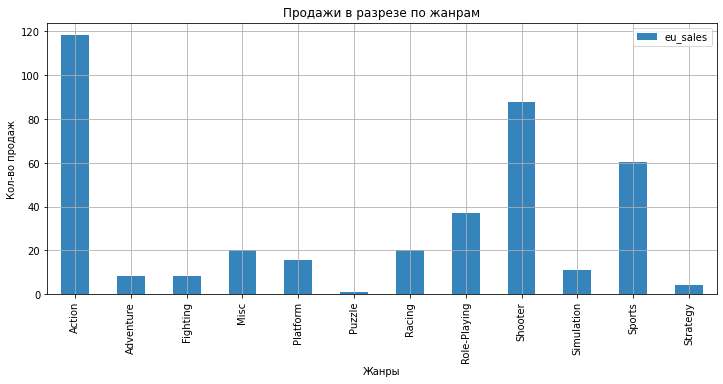

In [ ]:
(df_good.pivot_table(index='platform', values='eu_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('платформы')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по консолям ')
plt.show()

(df_good.pivot_table(index='genre', values='eu_sales', aggfunc=('sum'))
 .plot(kind='bar', grid=True, figsize=(12, 5), alpha=0.9));
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Продажи в разрезе по жанрам')
plt.show()

**ВЫВОД:** Европа предпочитает играть в Action, Shooter и Sports на PS3, XBOX One и PS4.


**Построим графики по платформам**

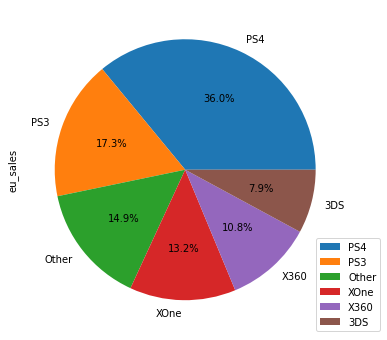

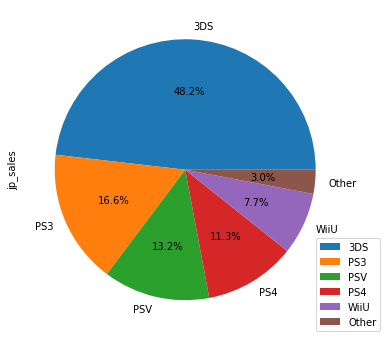

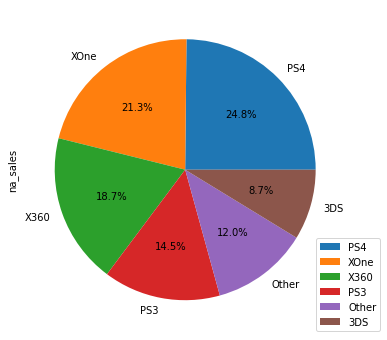

In [ ]:
list_country = ['eu_sales', 'jp_sales', 'na_sales']
name_eu = 'Продажи в Европе'
for i in list_country:
    df_markets = df_good.pivot_table(index = 'platform', values = i, aggfunc = 'sum')\
    .sort_values(by = i, ascending = False)
 
    top_platforms = df_markets.sort_values(by = i, ascending = False).iloc[:5].index.tolist()
    
    for j in df_markets.index:
        if j not in top_platforms:
            df_markets.rename(index={j:'Other'}, inplace = True)
                     
    df_markets = df_markets.pivot_table(index = 'platform', values = i, aggfunc = 'sum')\
    .sort_values(by = i, ascending = False)
    df_markets.plot.pie(y = i, figsize=(6, 6), autopct='%1.1f%%')
    
    plt.legend(loc="lower center", bbox_to_anchor=(1.0,-0.01))
    plt.show()

**Теперь по жанрам**

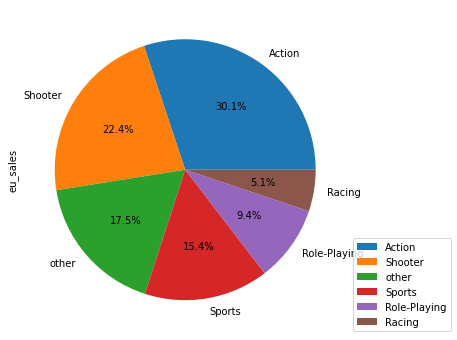

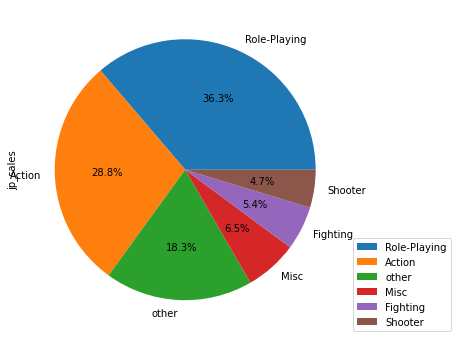

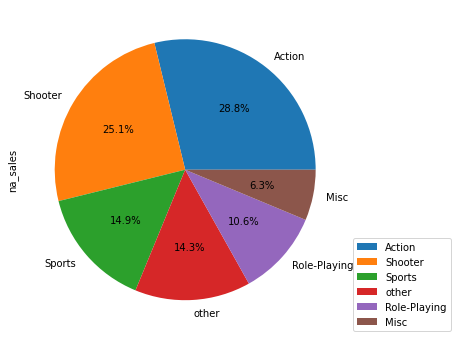

In [ ]:
list_country = ['eu_sales', 'jp_sales', 'na_sales']
 
for i in list_country:
    df_genre = df_good.pivot_table(index = 'genre', values = i, aggfunc = 'sum')\
    .sort_values(by = i, ascending = False)
 
    top_genre = df_genre.sort_values(by = i, ascending = False).iloc[:5].index.tolist()
    
    for j in df_genre.index:
        if j not in top_genre:
            df_genre.rename(index={j:'other'}, inplace = True)
                       
    df_genre = df_genre.pivot_table(index = 'genre', values = i, aggfunc = 'sum')\
    .sort_values(by = i, ascending = False)
 
    df_genre.plot.pie(y = i, figsize=(6, 6), autopct='%1.1f%%')
    plt.legend(loc="lower left", bbox_to_anchor=(1.0,-0.01))
    plt.show()

### **Посмотрим, как влияет рейтинг ESRB на продажи игр в этих регионах**

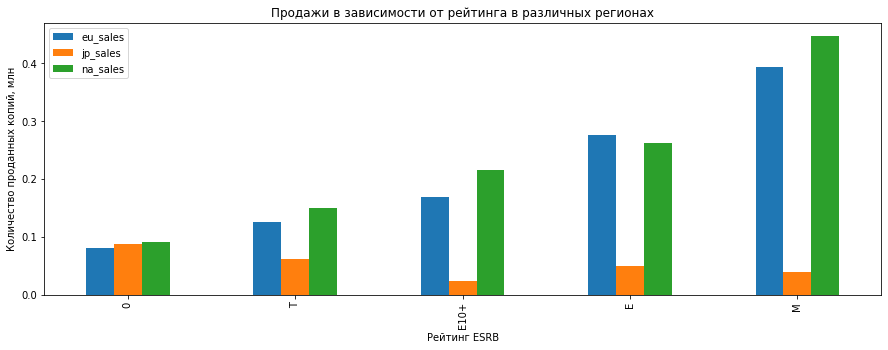

In [ ]:
(
    df_good.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Перед тем, как сделать выводы относительно влияния рейтинга, следует указать, что рынок Японии относительно всех стран Северной Америки(СА) достаточно мал. Отсюда и количественные различия в продажах.

Из графика можно сделать вывод, что на СА и Европу рейтинг влияет сильнее, чем на Японию. Что не удивительно, ведь "[Entertainment Software Rating Board (ESRB)](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде." Организация создана для присваивания рейтингов в СА, но Европа культурно схожа с СА. 

Большинство продаж в Японии занимают игры, которые не имеют рейтинга ESRB, а у Европы корреляция есть, но не такая сильная, как в СА.



## Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Задайте самостоятельно пороговое значение alpha.

Выдвинем гипотезу, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

H_0:  'Средние пользовательские рейтинги (user_score) Xbox One = Средние пользовательские рейтинги (user_score) PC`; 

H_a: 'Средние пользовательские рейтинги (user_score) Xbox One ≠  Средние пользовательские рейтинги (user_score) PC`.

alpha = 0.05.

In [ ]:
#для получения верного расчёта, уберем из датасета пропуски в пользовательских оценках
hypotesis = df_good[(df_good.user_score > 0) | (df_good.user_score.notna() & (df_good.year_of_release>2012))] 

# примем значение альфа как 5% критического уровня вероятности
alpha = 0.05 
results_platform = st.ttest_ind(hypotesis[hypotesis.platform == 'XOne']['user_score'], 
                                hypotesis[hypotesis.platform == 'PC']['user_score'])

print('p-value:', results_platform.pvalue) # вывод значения p-value
if (results_platform.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')   

p-value: 0.7262602004956025
Не получилось отвергнуть нулевую гипотезу


<a id='vv'></a>

<div class="alert alert-info">
<font size="4"><b> ВЫВОД:</b></font>
    <br /> 
    <font size="3", color = "black"> 
 Вероятность слишком большая, чтобы отвергнуть нулевую гипотезу.

In [ ]:
results_genre = st.ttest_ind(hypotesis[hypotesis.genre == 'Action']['user_score'], 
                             hypotesis[hypotesis.genre == 'Sports']['user_score'])

# примем значение альфа как 5% критического уровня вероятности
alpha = 0.05 

print('p-value:', results_genre.pvalue) # вывод значения p-value 
if (results_genre.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    


p-value: 1.0163952264107545e-09
Отвергаем нулевую гипотезу


**ВЫВОД:** Исходя из заданной нулевой гипотезы, что средние пользовательские рейтинги по жанрам **отличаются** друг от друга, я сформулировал альтернативную гипотезу, которая предполагает, что они **равны** друг другу.

Из уровня pvalue можно сделать предположение, что средние пользовательские оценки по жанрам совпадают.

*Вывод делается на имеющихся данных, а не по всей генеральной совокупности*

## Общий вывод

Я изучил данные по продажам игровых консолей и игр за период с 1980 по 2016 год. Из всего периода, для прогнозирования я брал период с 2013 по 2016 годы.

Выяснил, что средняя продолжительность "жизни" консоли составляет 6-8 лет, именно такой период необходим производителю для выпуска консоли следующего поколения.

Так же я составил портреты пользователей из трех регионов - Северной Америки, Японии и Европы.

В топ 5 консолей по продажам входят консоли от Nintendo, Playstation и Microsoft. Но для каждого региона очередность позиций различается.
Доли рынка Северной Америки среди основных платформ распределены следующим образом:
* PS4 – 24,8%
* XBOX One - 21,3%
* XBOX360 – 18,7%
* PS3 – 14,5%
* 3DS – 8,7%

В Японии предпочитают играть на местных консолях, причем большой популярностью пользуются именно портативные, которые удобно носить с собой:
* 3DS – 48.2%
*	PS3 – 16.6%
*	PSV – 13.2%
*	PS4 – 11.3%
*	WiiU- 7.7%

Европейский рынок похож на Североамериканский:
*	PS4 - 36%
*	PS3 – 17.3%
*	XBOX One – 13.2%
*	XBOX360 – 10.8%
*	3DS – 7.9%

С 1995 года наблюдается рост количества выпущенных игр в мире. Это говорит о том, что игровые консоли стало проще купить и людям интересна игровая индустрия как вариант проведения досуга.

По состоянию на 2016 год самыми популярным платформами являются PS4, PS3 и XboxOne. Самые непопулярные платформы – PSP и PSV. Медианное значение продаж игр на всех платформах не дотягивает до 500 тысяч копий. Но в каждой платформе, кроме Nintendo DS и PSP есть игры-хиты, которые продались больше 10 млн копий.

Между оценкой критиками игры и её продажами есть небольшая взаимосвязь. Чем лучше оценка от критиков, тем больше вероятность, что игра будет продаваться большим тиражом. При продаже игр, стоит обращать на это внимание.

На рейтинги ESRB больше всего внимание обращают пользователи из Северной Америки и Европы. Японским пользователям эти рейтинги "до лампочки".

Если обратить внимание на жанровое распределение, то я рекомендую в 2017 году для пользователей:
*	Европы и Америки делать упор на продажи игр жанра Action, Spotrs и Shooter;
*	В Японии, лучше всего будут продаваться игры жанров RPG и Action.


**Прогноз на 2017 год по игровым платформам.**

В 2017 году, несмотря на снижение продаж, все так же популярными игровыми консолями у пользователей будут **3DS, PS3 и XBOX360**. Консоли нового поколения - **PS4 и XBOX One** будут набирать популярность и дальше.

**Отдельно стоит отметить такую игровую платформу, как PC**. Несмотря на её небольшую популярность у пользователей, она стабильно удерживает свою нишу уже более 20 лет и будет оставаться на игровом рынке ещё не один год.

*Моя рекомендация*

Стоит увеличить количество консолей нового поколения на складах, а также начать предлагать больше игр для них.

Рекомендация для инженеров данных магазина "Стримчик":
* при дальнейшем сборе и агрегации данных, обратить внимание на большое количество пропусков в столбцах рейтингов
